#                 Taller de procesamiento de imágenes en Python. 

![](python.png)

### Autor: Cazajous Miguel A.


# Informe trabajo práctico Nº 3:

### Instalamos pip
python -m ensurepip --default-pip
### Utilizamos un archivo para instalar todos los módulos que se van a necesitar para el práctico
sudo pip install -r módulos

**Dentro del archivo se van agregando los módulos que se necesitan y se corre el comando anterior. Los módulos ya instalados no se reinstalan**

# Introducción:

## Filtros morfológicos:

Si bien la morfología se emplea en muchas áreas, en nuestro caso nos referimos a la morfología matemática, la cual trabaja con conjuntos de datos que son la representación de imágenes, principalmente imágenes binarias.

Algunos de los operadores más básicos de morfología binaria son:
 
* Erosión: Toma diferentes regiones de la imagen eliminando capas de pixeles interiores y exteriores, haciendo la brecha entre ellas más notable. Pixeles aislados son descartados.
* Dilatación: Lo contrario a erosión. Las brechas entre regiones se hacen más delgadas y puntos aislados son "unidos" a las regiones.
* Apertura: Erosión seguida de dilatación.
* Cierre: Dilatación seguida de erosión.

## Clases

Podemos encontrar métodos de clasificación basados en pixeles y basados en objetos. Los primeros no tienen en cuenta una posible relación entre pixeles vecinos. El segundo agrupa los pixeles según ciertas características en común, el proceso se conoce como segmentación y como se verá más adelante pueden ser agrupados teniendo en cuenta los valores RGB de un grupo de pixeles.

## Filtro Canny

Es un algoritmo de varias etapas para la detección de bordes. Teniendo en cuenta que la detección de bordes se ve afectada por el ruido, el filtro de Canny primero aplica un filtro Gaussiano con el fin de removerlo.
Utiliza luego el operador de Sobel y el concepto de módulo y dirección de Gradiente para remover puntos aislados que no forman parte del borde. 
Luego mediante el uso de un valor umbral determina que parte de lo detectado anteriormente constituye o no un borde.

En resumen lo que obtenemos al aplicar el filtro a una imagen es lo siguiente.

![](https://docs.opencv.org/3.4/canny1.jpg)

### Referencias:

* Guía propia del seminario
* [Morfología matemática](https://es.wikipedia.org/wiki/Morfología_matemática)
* [Morphology](https://www.cs.auckland.ac.nz/courses/compsci773s1c/lectures/ImageProcessing-html/topic4.htm)
* [Clasificación de imágenes](https://pro.arcgis.com/es/pro-app/help/data/imagery/overview-of-image-classification.htm)
* [Canny Edge Detector](https://en.wikipedia.org/wiki/Canny_edge_detector)
* [OpenCV Canny Edge Detector](https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html)


### Se deben correr secuencialmente los ejercicios, ya que puede que alguno dependa de uno anterior.

## Ejercicio 1:

### Genere dos máscaras o elementos estructurales, uno circular y otro cuadrado. Ambos los suficientemente amplios para que abarquen al pixel central y al menos 10 vecinos.

Previamente se mencionó sobre las máscaras de suavizado, las cuales promedian un pixel con sus vecinos. Las que hemos mencionado son las siguientes.

$M = \left[\begin{matrix}1/9 & 1/9 & 1/9\\
                     1/9 & 1/9 & 1/9\\
                      1/9 & 1/9 & 1/9\\\end{matrix}\right]$

$M = \left[\begin{matrix}1/25 & 1/25 & 1/25 & 1/25 & 1/25\\
                     1/25 & 1/25 & 1/25 & 1/25 & 1/25\\
                      1/25 & 1/25 & 1/25 & 1/25 & 1/25\\
                       1/25 & 1/25 & 1/25 & 1/25 & 1/25\\
                        1/25 & 1/25 & 1/25 & 1/25 & 1/25\end{matrix}\right]$
            
Para poder alcanzar a 10 vecinos usamos la segunda. Puede elegirse también una matriz con todos sus elementos iguales a 1.

Para la matriz circular definimos.

$M = \left[\begin{matrix}1 & 4 & 6 & 4 & 1\\
                         4 & 16 & 24 & 16 & 1\\
                         6 & 24 & 36 & 24 & 6\\
                         4 & 16 & 24 & 16 & 1\\
                         1 & 4 & 6 & 4 & 1\end{matrix}\right]$

In [1]:
import numpy as np 

#Definimos una máscara circular de 5x5 de la siguiente forma.
circular = np.array([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])

#Definimos una matriz cuadrada.
cuadrado = np.ones([5,5])
cuadrado = cuadrado * 1/25

print("Kernel circular: \n\n", circular, '\n\nKernel cuadrado: \n\n', cuadrado)

Kernel circular: 

 [[ 1  4  6  4  1]
 [ 4 16 24 16  4]
 [ 6 24 36 24  6]
 [ 4 16 24 16  4]
 [ 1  4  6  4  1]] 

Kernel cuadrado: 

 [[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


## Ejercicio 2:

### Binarice una imagen a elección buscando demarcar uno o varios objetos en esta (puede ser eligiendo un umbral a partir del histograma de una imagen monocroma). Al resultado aplicarle 2 o 3 filtros morfológicos en el orden que crea adecuado para mejorar la segmentación y utilizando uno de los dos elementos estructurales creados en el ejercicio 1.

/usr/lib/python3.7/site-packages/matplotlib/figure.py:2314: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  warnings.warn("Calling figure.constrained_layout, but figure not "


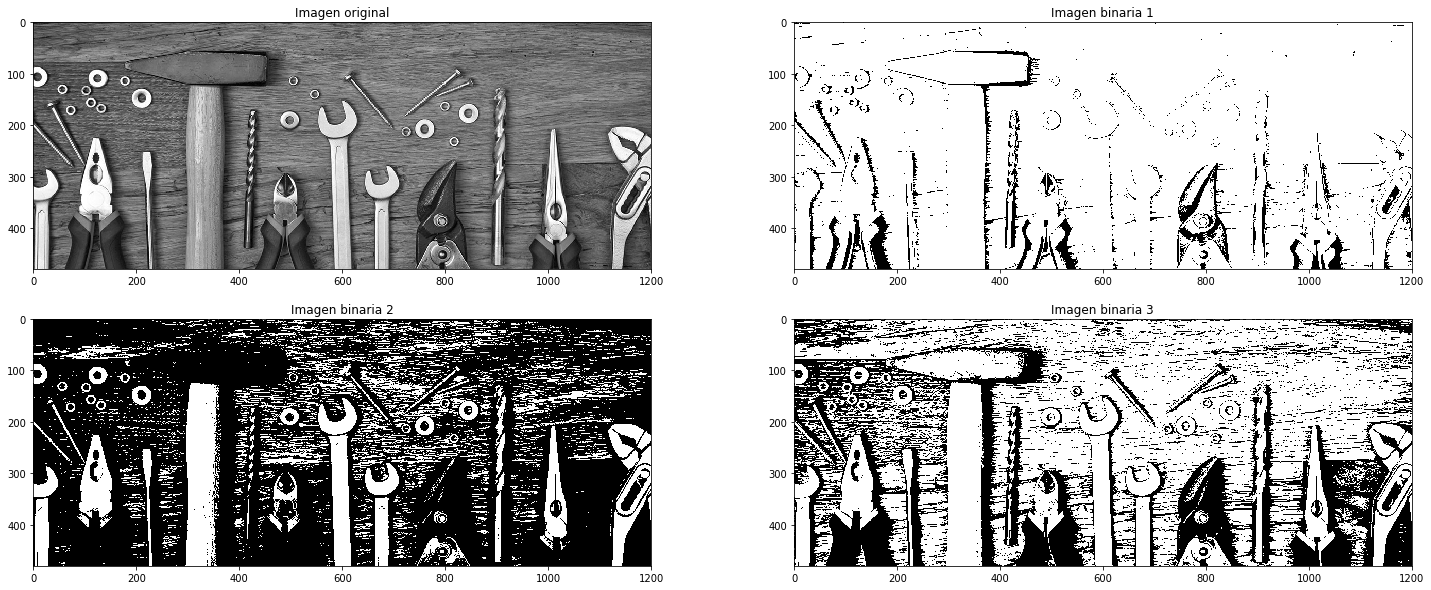

In [2]:
import cv2 as cv
from matplotlib import pyplot as plt
from matplotlib import gridspec as gridspec

%matplotlib inline  
 
imagen = cv.imread('tools.jpg', cv.IMREAD_GRAYSCALE)
imagen = imagen.astype('uint8')

#Definimos una función que devuelve la matriz binaria correspondiente de la imagen original.
#En x e y guardamos las dimensiones de la matriz. En la variable t especificamos con 1 si queremos que 
#cuando se sobrepase el valor umbral se considere blanco (255), de lo contrario si pasa el valor umbral
#será negro (0). En este último caso se invertiría la imagen.
def binaria(x,y,umbral,imagen,t):
    imagen_bin_est=np.empty([x,y])
    if (t == 1):
        a = 255
        b = 0
    else:
        a = 0
        b = 255
    for i in range(0,len(imagen[:,0])):
        for j in range(0, len(imagen[0,:])):
            if imagen[i][j] > umbral:
                imagen_bin_est[i][j] = a
            else:
                imagen_bin_est[i][j] = b
    return imagen_bin_est

# Mediante prueba y error se buscó ese valor de umbral que permite
# se pueda distinguir mejor a los objetos sobre la mesa.
imagen_bin1 = binaria(len(imagen[:,0]),len(imagen[0,:]), 50, imagen, 1)
imagen_bin2 = binaria(len(imagen[:,0]),len(imagen[0,:]), 130, imagen, 1)
imagen_bin3 = binaria(len(imagen[:,0]),len(imagen[0,:]), 95, imagen, 1)

#Armamos la grilla.
gs = gridspec.GridSpec(2, 2)

#Define los tamaños de las imágenes
figs = plt.figure(constrained_layout=True)
figs.set_figheight(10)
figs.set_figwidth(25)

#Aquí se pueden definir los tamaños de las celdas.
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

ax1.set_title("Imagen original")
ax1.imshow(imagen, cmap='gray', vmin=0, vmax=255)
ax2.set_title("Imagen binaria 1")
ax2.imshow(imagen_bin1, cmap='gray', vmin=0, vmax=255)
ax3.set_title("Imagen binaria 2")
ax3.imshow(imagen_bin2, cmap='gray', vmin=0, vmax=255)
ax4.set_title("Imagen binaria 3")
ax4.imshow(imagen_bin3, cmap='gray', vmin=0, vmax=255)

plt.show()

En el primer intento de binarización vemos que se pierden fácilmente los contornos. En la segunda, la herramientas que poseen valores más oscuros se unifican con el fondo y se pierden también algunos bordes.
En la tercera buscamos encontrar un balance entre las dos anteriores, logrando un resultado bastante bueno.

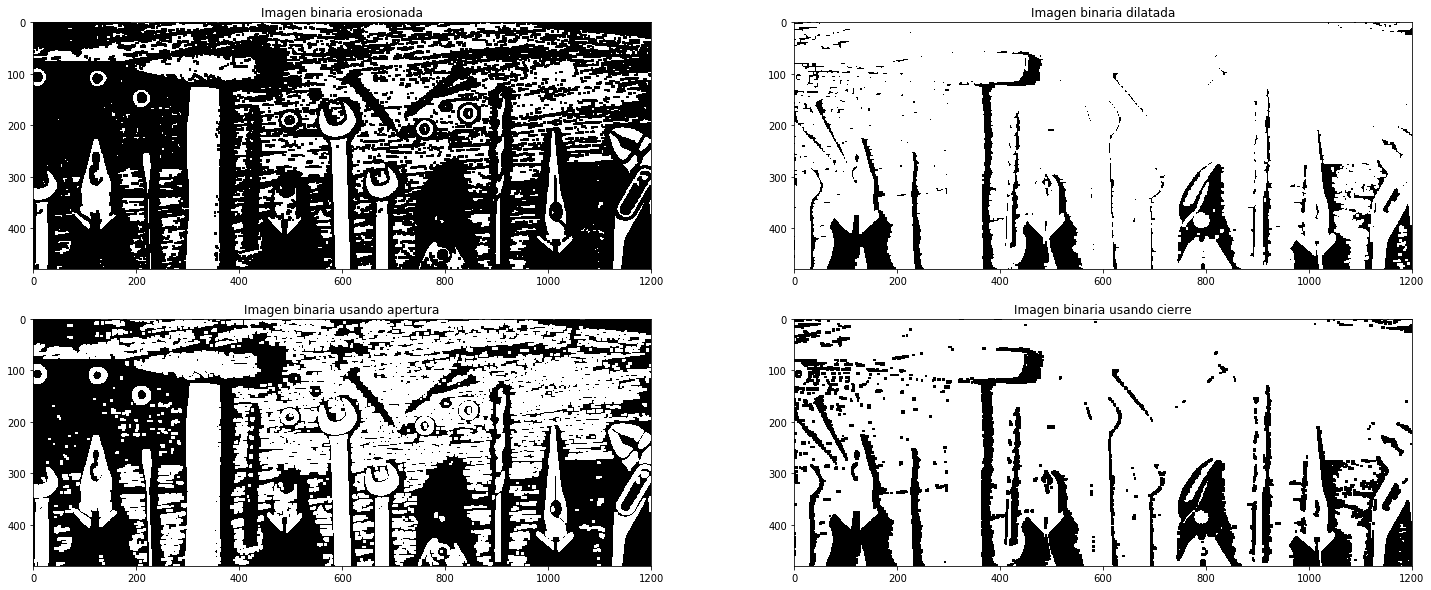

In [3]:
#Aplicación de operaciones morfológicas.
erosion = cv.erode(imagen_bin3,circular,iterations = 1)
dilatacion = cv.dilate(imagen_bin3,circular,iterations = 1)
apertura = cv.morphologyEx(imagen_bin3, cv.MORPH_OPEN, circular)
cierre = cv.morphologyEx(imagen_bin3, cv.MORPH_CLOSE, circular)

#Armamos la grilla.
gs = gridspec.GridSpec(2, 2)

#Define los tamaños de las imágenes
figs = plt.figure(constrained_layout=True)
figs.set_figheight(10)
figs.set_figwidth(25)

#Aquí se pueden definir los tamaños de las celdas.
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

ax1.set_title("Imagen binaria erosionada")
ax1.imshow(erosion, cmap='gray', vmin=0, vmax=255)
ax2.set_title("Imagen binaria dilatada")
ax2.imshow(dilatacion, cmap='gray', vmin=0, vmax=255)
ax3.set_title("Imagen binaria usando apertura")
ax3.imshow(apertura, cmap='gray', vmin=0, vmax=255)
ax4.set_title("Imagen binaria usando cierre")
ax4.imshow(cierre, cmap='gray', vmin=0, vmax=255)

plt.show()

Vemos que se obtienen mejores resultados realizando primero una erosión. Incluso en la operación de apertura donde se realiza una dilatación luego de la erosión, parece empeorar el resultado. De modo que la dilatación parece no funcionar para este caso.

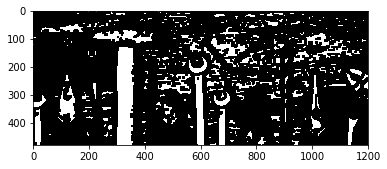

In [5]:
erosion2 = cv.erode(erosion,circular,iterations = 1)
plt.imshow(erosion2, cmap = 'gray', vmin=0, vmax=255)
plt.show()

Aplicando una segunda operación de erosión arruina por completo la imagen.

## Ejercicio 3:

### Mostrar en una misma ventana, la imagen original, la binaria y la resultante de aplicarle los filtros. Comente si tuvo buenos resultados.

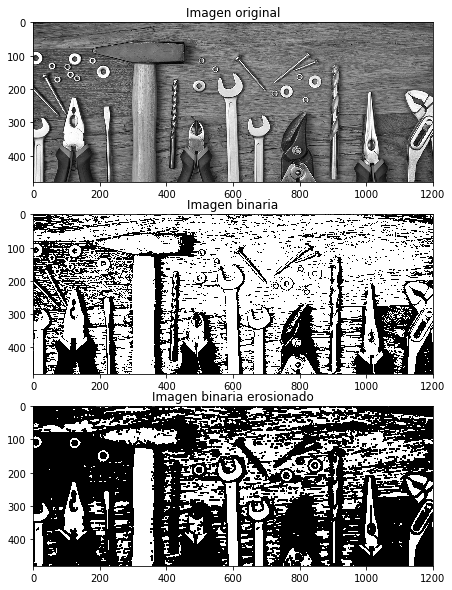

In [6]:
#Armamos la grilla.
gs = gridspec.GridSpec(3, 1)

#Define los tamaños de las imágenes
figs = plt.figure(constrained_layout=True)
figs.set_figheight(10)
figs.set_figwidth(25)

#Aquí se pueden definir los tamaños de las celdas.
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

ax1.set_title("Imagen original")
ax1.imshow(imagen, cmap='gray', vmin=0, vmax=255)
ax2.set_title("Imagen binaria")
ax2.imshow(imagen_bin3, cmap='gray', vmin=0, vmax=255)
ax3.set_title("Imagen binaria erosionado")
ax3.imshow(erosion, cmap='gray', vmin=0, vmax=255)
plt.show()

Si comparamos la imagen binaria con la imagen luego de aplicar la operación de erosión, vemos que los resultados no son buenos, pues antes de aplicar las operaciones morfológicas se conseguía un mejor resultado. El uso de la máscara gaussiana quizás no es la adecuada y/o la imagen es un tanto compleja, quizás también, el uso de operaciones morfológicas no está bien utilizado en este caso.

## Ejercicio 4:

### Encuentre bordes o el contorno del objeto u objetos en la imagen binaria utilizando operaciones morfológicas.

In [7]:
#Hacemos una conversión de tipo
imagen_bin3=imagen_bin3.astype('uint8')

#Filtro Canny definiendo el tamaño de la imagen.
canny = cv.Canny(imagen_bin3, len(imagen_bin3[:,0]), len(imagen_bin3[0,:]))

#Buscamos contornos
(_, contornos,_) = cv.findContours(canny.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

#Cuenta la cantidad de objetos
print("Hemos encontrado %d objetos" % len(contornos))

Hemos encontrado 5058 objetos


Sin necesidad de graficar, vemos que la cantidad de objetos detectados no es la correcta y si vemos la imagen binaria obtenida anteriormente, podemos intuir el motivo. A simple vista se pueden reconocer los objetos, pero un programa seguramente confunde lo que realmente vemos como objetos con el "rayado" del fondo (mesa) donde están ubicados los objetos.

Vamos a repetir el proceso utilizando otra imagen.

Hemos encontrado 8 objetos


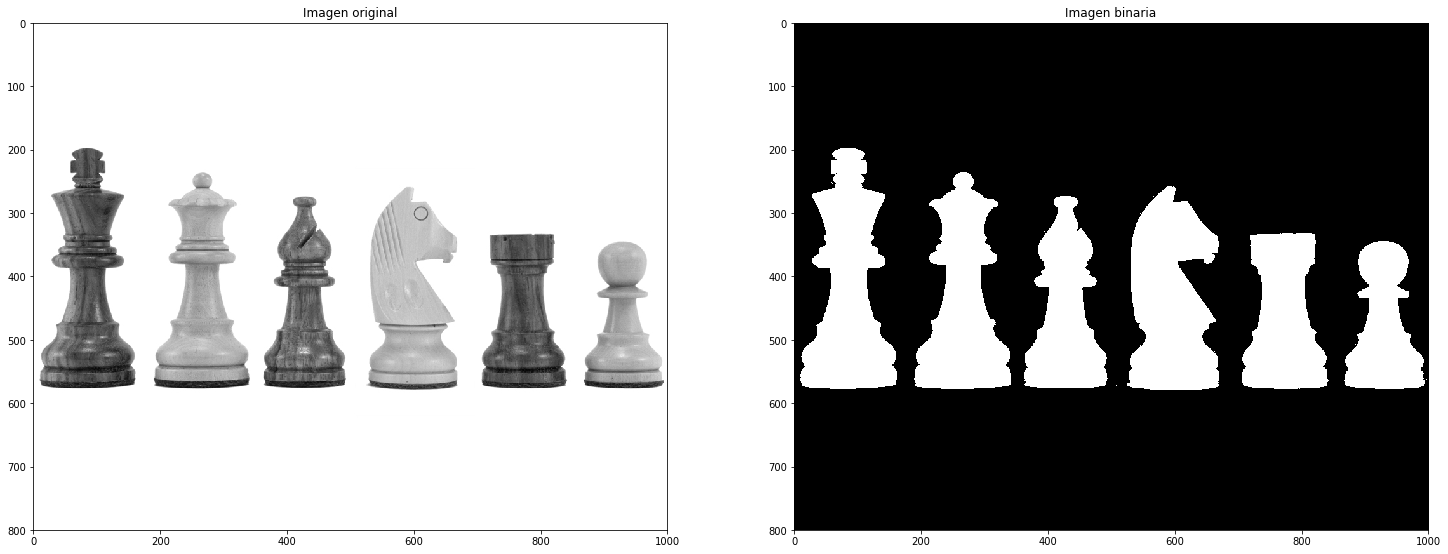

In [8]:
#Abrimos una nueva imagen
imagen = cv.imread('chess.jpg', cv.IMREAD_GRAYSCALE)

#Binarizamos la imagen
imagen_bin = binaria(len(imagen[:,0]),len(imagen[0,:]), 253, imagen, 2)

#Armamos la grilla.
gs = gridspec.GridSpec(1, 2)

#Define los tamaños de las imágenes
figs = plt.figure(constrained_layout=True)
figs.set_figheight(10)
figs.set_figwidth(25)

#Aquí se pueden definir los tamaños de las celdas.
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

ax1.set_title("Imagen original")
ax1.imshow(imagen, cmap='gray', vmin=0, vmax=255)
ax2.set_title("Imagen binaria")
ax2.imshow(imagen_bin, cmap='gray', vmin=0, vmax=255)

#Repetimos los pasos antes realizados.
imagen_bin = imagen_bin.astype('uint8')
canny = cv.Canny(imagen_bin, len(imagen_bin[:,0]), len(imagen_bin3[0,:]))
(_, contornos,_) = cv.findContours(canny.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
print("Hemos encontrado %d objetos" % len(contornos))

plt.show()

Vemos que la cantidad de objetos que el programa detectó no es la correcta, pero está mucho más aproximado que con la imagen anterior. Además en esta última todavía no se han realizado aún operaciones morfológicas.

Vamos a realizar una operación de erosión para intentar remover puntos aislados que posiblemente el programa detecta como un objeto. Si observamos entre el alfil y el caballo hay un punto blanco que puede estar afectando el conteo.

Hemos encontrado 6 objetos


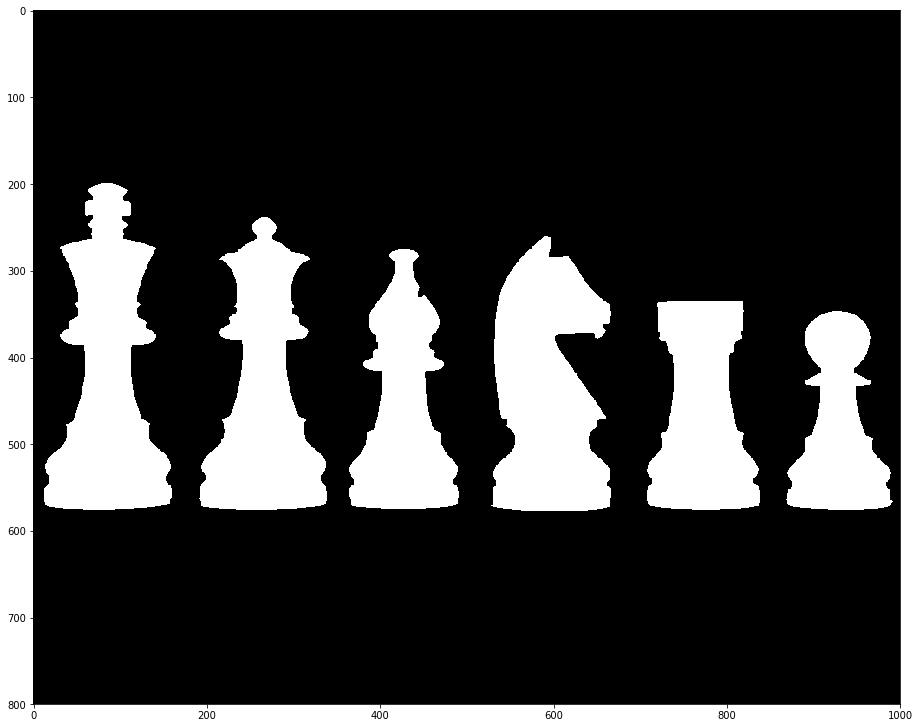

In [9]:
#Realizamos una erosión para remover posibles puntos aislados.
erosion = cv.erode(imagen_bin,circular,iterations = 1)

#Repetimos los pasos antes realizados.
erosion = erosion.astype('uint8')
canny = cv.Canny(erosion, len(erosion[:,0]), len(erosion[0,:]))
(_, contornos,_) = cv.findContours(canny.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
print("Hemos encontrado %d objetos" % len(contornos))

#Define los tamaños de las imágenes
figs = plt.figure(constrained_layout=True)
figs.set_figheight(10)
figs.set_figwidth(25)

plt.imshow(erosion, cmap='gray', vmin=0, vmax=255)
plt.show()

Podemos ver que el conteo de objetos es exacto. Graficamos ahora el contorno de los objetos sobre la imagen original.

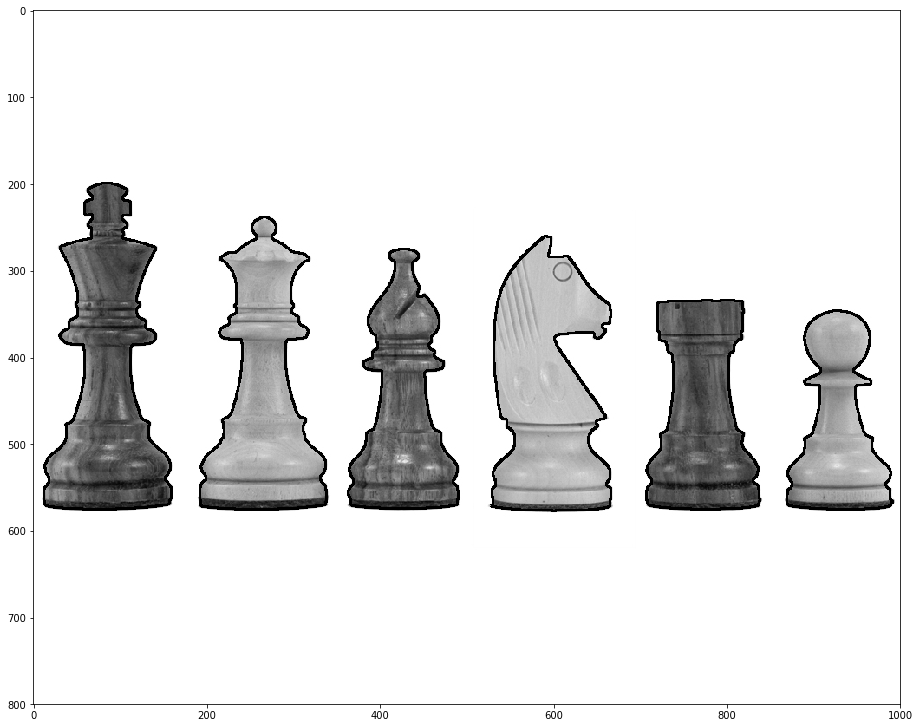

In [10]:
#Graficamos los contornos.
cv.drawContours(imagen,contornos,-1,(0,0,255), 2)

#Define los tamaños de las imágenes
figs = plt.figure(constrained_layout=True)
figs.set_figheight(10)
figs.set_figwidth(25)
plt.imshow(imagen, cmap='gray', vmin=0, vmax=255)
plt.show()

## Ejercicio 5:

### Cargar una imagen a color (a elección), que a su criterio tenga entre 2 y 7 clases en ella. Explique coloquialmente la cantidad y criterio visual que utilizó para identificarlas.

Debemos hacer una clasificación supervisada de una simple imagen, tomando como muestras los diferentes pixeles que la componen, y ya que ésta es a color vamos a identificar las clases simplemente como diferentes secciones donde haya una notoria variación en sus valores RGB.

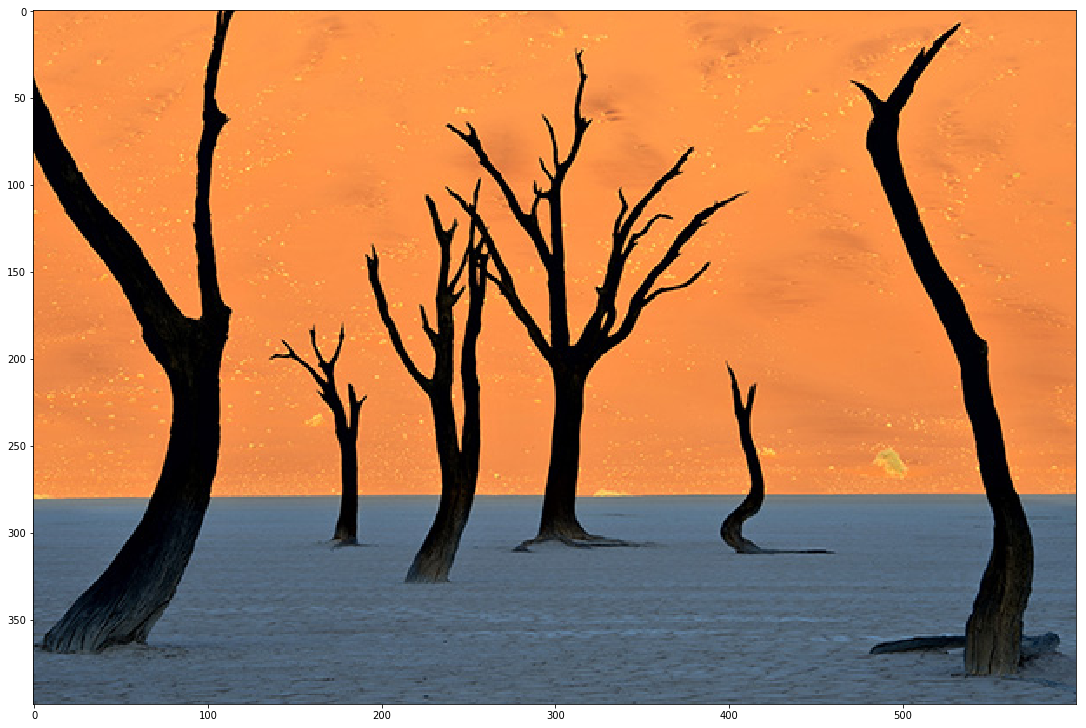

In [11]:
#Abrimos la imagen
imagen = cv.imread('Namibia.jpg')

#Define los tamaños de las imágenes
figs = plt.figure(constrained_layout=True)
figs.set_figheight(10)
figs.set_figwidth(25)

plt.imshow(cv.cvtColor(imagen, cv.COLOR_BGR2RGB), cmap='gray')
plt.show()

Basándonos en los diferentes colores de la imagen podemos seleccionar o identificar 3 diferentes clases.

## Ejercicio 6:

### Agregue una o dos características más a la imagen que considere puedan ser relevantes para la clasificación.

En algunas zonas podemos ver que además del color también hay diferencias de texturas, podemos incluir esa característica a las anteriores para mejorar el análisis.

Para el análisis de texturas existe lo que se conoce como filtro de Gabor. Este se aplica de manera similar a otros filtros ya utilizados, posee también una máscara o kernel y utiliza la operación de convolución sobre la matriz que representa la imagen. El resultado final es otra imagen donde se representan los cambios de texturas (incluye bordes).

También se pueden agregar filtros de Sobel entre otros para la detección de bordes como se ha visto anteriormente con las máscaras Sobel X e Y.

* [Gabor filter](https://cvtuts.wordpress.com/2014/04/27/gabor-filters-a-practical-overview/)
* [Image filtering](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html?highlight=gabor)

## Ejercicio 7:

### Construya una muestra de entrenamiento de la imagen utilizando todas las características.

Lo que obtenemos al ejecutar los siguientes códigos es [coordenda x, coordenada y, ancho, alto], donde el par (x, y) es el vértice izquierdo superior.
Debemos marcar diferentes áreas buscando patrones en común entre los pixeles. Vamos a intentar agruparlos por sus valores RGB.
Ya que tenemos 3 grupos de colores vamos a tener 3 regiones de interés.

In [54]:
showCrosshair = False
fromCenter = False
roi1 = cv.selectROI("delimite la ROI+ent+tecla", imagen, fromCenter, showCrosshair)
cv.waitKey()  
print('ROI1:',roi1)
print('(columna, fila, anchocol, anchofila)')
cv.destroyAllWindows()

ROI1: (0, 0, 0, 0)
(columna, fila, anchocol, anchofila)


In [276]:
roi2 = cv.selectROI("delimite la ROI+ent+tecla", imagen, fromCenter, showCrosshair)
cv.waitKey() 
print('ROI2:',roi2)
print('(columna, fila, anchocol, anchofila)')
cv.destroyAllWindows()

ROI2: (74, 187, 21, 142)
(columna, fila, anchocol, anchofila)


In [277]:
roi3 = cv.selectROI("delimite la ROI+ent+tecla", imagen, fromCenter, showCrosshair)
cv.waitKey()
print('ROI3:',roi3)
print('(columna, fila, anchocol, anchofila)')
cv.destroyAllWindows()

ROI3: (108, 318, 397, 76)
(columna, fila, anchocol, anchofila)


In [ ]:
#Forma una lista de listas. 
rois = [roi1, roi2, roi3]

## Para no realizar la selección de las regiones de interés se presentan dos ejemplos para más comodidad.

### Ejemplo 1: Consideramos una muestra precisa.

Aquí las áreas rodean exclusivamente un único color.

In [12]:
rois = [[125, 4, 98, 127], [87, 198, 12, 80], [155, 337, 306, 52]]

### Ejemplo 2: Consderamos una muestra imprecisa.

En este ejemplo deliberadamente se utilizó rectángulos que rodean un solo color, pero incluyendo apenas otros colores para "ensuciar" las regiones de interés.

In [278]:
rois = [[111, 5, 134, 112], [74, 187, 21, 142], [108, 318, 397, 76]]

In [13]:
import pandas as pd

#Multiplica los dos últimos valores de cada roi# y los suma. 
#De esta manera se consigue el total de pixeles que están en las 3 regiones.
cantidad=0
for i in range(3):
    cantidad=cantidad+(rois[i][2]*rois[i][3])
print ("cantidad:", cantidad)

#Arma una matriz de [cantidad][3] y un vector[cantidad]
#la cantidad de columnas (3) equivale a los valores RGB
data=np.zeros([cantidad,3])
target=np.zeros(cantidad)

#En data va guardando los valores RGB por cada pixel que está
#dentro de las regiones de interéspixel. Esos valores son vectores
#de longitud 3.
cuenta=0
for i in range(3):
    roi=rois[i]
    for fil in range (roi[1],roi[1]+roi[3]):
        for col in range (roi[0],roi[0]+roi[2]):
            data[cuenta,:]=imagen[fil,col,:]
            target[cuenta]=i
            cuenta=cuenta+1

#Vemos que "cuenta" tiene el mismo valor que "cantidad".
#Es decir que pasó por todos los pixeles de las 3 regiones.
print("cuenta:", cuenta) 

#Arma un dataframe usando la matriz data. 
#El orden de los colores en "columns" se modificó a BGR 
#viendo que el último valor de la región del cielo tiene un 255
#y siendo el cielo naranja, el valor 255 tiene que ser
#rojo y no azul.
df = pd.DataFrame(data, columns=["azul","verde","rojo"])

print("\ndf: (filas, columnas)", df.shape)

#Imprime solo unas pocas filas.
df.head()

cantidad: 29318
cuenta: 29318

df: (filas, columnas) (29318, 3)


azul  verde   rojo
0  76.0  154.0  255.0
1  77.0  155.0  255.0
2  77.0  155.0  255.0
3  76.0  154.0  255.0
4  76.0  154.0  255.0

Si vamos a agregar una nueva columna de datos, la misma debe tener igual cantidad de filas que el dataframe. Vamos a considerar un filtro de Sobel para la detección de bordes.

Recordando:

Un operador de sobel de 5x5 que se define de la siguiente manera.

$$G_x=\left[\begin{matrix} 2&2&4&2&2  \\ 1&1&2&1&1 \\ 0&0&0&0&0 \\ -1&-1&-2&-1&-1 \\ -2&-2&-4&-1&-1 \end{matrix}\right]$$

$$G_y=G_x^T$$

Definimos los operadores de Sobel X e Y.

In [14]:
from scipy import signal

#Definimos dos vectores 
array = np.arange(-2,3)*-1
print(array)

#Armamos dos grillas.
sobely, sobelx = np.meshgrid(array, array)
print("\ntemporal x: \n\n", sobelx)
print("\n\ntemporal y: \n\n", sobely)

#Multiplicamos por dos la columna 2 de sobel x
#y la fila 2 de sobel y para obtener la matriz deseada.
sobelx[:,2]=sobelx[:,2]*2
sobely[2,:]=sobely[2,:]*2

print("\nsobel x: \n\n", sobelx)
print("\n\nsobel y: \n\n", sobely)

#Abrimos la imagen en escala de grises
imagen2 = cv.imread('Namibia.jpg', cv.IMREAD_GRAYSCALE)

#Obtenemos las imagenes filtradas con sobel x e y
#usando la operación de convolución del módulo scipy.signal
filtradox = signal.convolve2d(imagen2, sobelx, boundary='symm', mode='same')
filtradoy = signal.convolve2d(imagen2, sobely, boundary='symm', mode='same')

[ 2  1  0 -1 -2]

temporal x: 

 [[ 2  2  2  2  2]
 [ 1  1  1  1  1]
 [ 0  0  0  0  0]
 [-1 -1 -1 -1 -1]
 [-2 -2 -2 -2 -2]]


temporal y: 

 [[ 2  1  0 -1 -2]
 [ 2  1  0 -1 -2]
 [ 2  1  0 -1 -2]
 [ 2  1  0 -1 -2]
 [ 2  1  0 -1 -2]]

sobel x: 

 [[ 2  2  4  2  2]
 [ 1  1  2  1  1]
 [ 0  0  0  0  0]
 [-1 -1 -2 -1 -1]
 [-2 -2 -4 -2 -2]]


sobel y: 

 [[ 2  1  0 -1 -2]
 [ 2  1  0 -1 -2]
 [ 4  2  0 -2 -4]
 [ 2  1  0 -1 -2]
 [ 2  1  0 -1 -2]]


Recordando que podemos combinar las dos imágenes filtradas en una mediante la siguiente operación.

$$G = \sqrt{G_x^2+G_y^2}$$

[Sobel Derivatives](https://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/sobel_derivatives/sobel_derivatives.html)

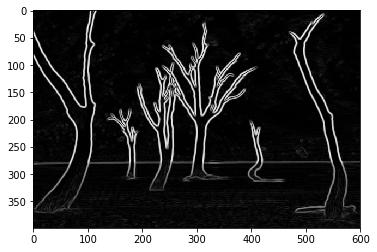

In [15]:
#Detección de bordes.
G = np.sqrt(filtradox**2+filtradoy**2)

plt.imshow(G, cmap='gray')
plt.show()

Vamos ahora a hacer una pequeña modificación en el código anterior para poder agregar una columna extra. Debemos usar la matriz "G".

In [16]:
#Definimos el vector donde guardamos los datos
#luego de procesar la matriz G
data2=np.zeros([cantidad])

#Realizamos un procedimiento similar al anterior.
cuenta=0
for i in range(3):
    roi=rois[i]
    for fil in range (roi[1],roi[1]+roi[3]):
        for col in range (roi[0],roi[0]+roi[2]):
            data2[cuenta]=G[fil,col]
            cuenta=cuenta+1
           
print("longitud vector data2", len(data2))

#Definimos la matriz que guardará el resultado de 
#concatenar data con data2
data3=np.zeros([cantidad,4])

#Agregamos el vector data2 como columna a data.
for i in range(cuenta):
    data3[i] = np.append(data[i], data2[i])
    
#Matriz data3
print("Matriz data3", data3.shape)
    
#Nuevo dataframe
df = pd.DataFrame(data3, columns=["azul","verde","rojo", "borde"])

#Imprime solo unas pocas filas.
df.head()

longitud vector data2 29318
Matriz data3 (29318, 4)


azul  verde   rojo  borde
0  76.0  154.0  255.0   18.0
1  77.0  155.0  255.0    6.0
2  77.0  155.0  255.0    6.0
3  76.0  154.0  255.0   18.0
4  76.0  154.0  255.0   12.0

Se observa ahora una nueva columna que corresponde a los valores de la imagen resultante luego de aplicar el filtro Sobel a cada pixel dentro de las regiones. De esta forma se consiguió agregar nuevos campos al dataframe para representar la imagen.

## Ejercicio 8:

### Realice un análisis exploratorio con gráficos de la muestra de entrenamiento discriminando con diferente color cada clase.

Primero se grafica en 2D usado solo 2 variables. Podemos hacer 3 gráficos como si fueran vistas de un gráfico en 3D.

cantidad de observaciones: 29318
cantidad de clases: 3
cantidad de variables/dimension: 3
se grafican de a dos (dimensión 2)


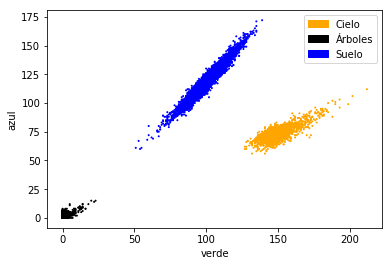

In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#Definimos colores para representar los elementos de la imagen.
colores=['orange','black','blue']
variables=["azul","verde","rojo"]

#Verde
variable1=variables[1]

#Azul
variable2=variables[0]

#Rojo
variable3=variables[2]

#Guarda la columna correspondiente en f1 y f2.
f1 = df[variable1].values
f2 = df[variable2].values
f3 = df[variable3].values
f4 = target

asignar=[]
l=len(f4)
print('cantidad de observaciones:', l)
print('cantidad de clases:',3)
print('cantidad de variables/dimension:',3)
print('se grafican de a dos (dimensión 2)')

for i in range(l):
    if(f4[i]==0):
        asignar.append(colores[0])
    elif (f4[i]==1):
        asignar.append(colores[1])
    else:
        asignar.append(colores[2])
        
plt.scatter(f1, f2, c=asignar, s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)
patch1 = mpatches.Patch(color=colores[0], label='Cielo')
patch2 = mpatches.Patch(color=colores[1], label='Árboles')
patch3 = mpatches.Patch(color=colores[2], label='Suelo')
plt.legend(handles=[patch1,patch2,patch3])
plt.show()

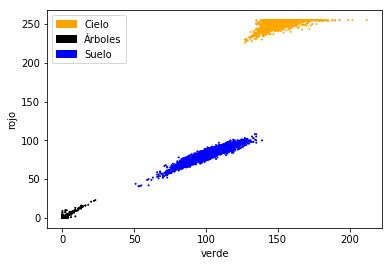

In [18]:
plt.scatter(f1, f3, c=asignar, s=1)
plt.xlabel(variable1)
plt.ylabel(variable3)
plt.legend(handles=[patch1,patch2,patch3])
plt.show()

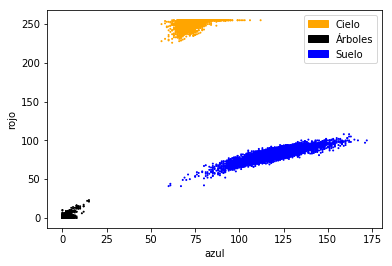

In [19]:
plt.scatter(f2, f3, c=asignar, s=1)
plt.xlabel(variable2)
plt.ylabel(variable3)
plt.legend(handles=[patch1,patch2,patch3])
plt.show()

Graficamos ahora las 3 variables juntas

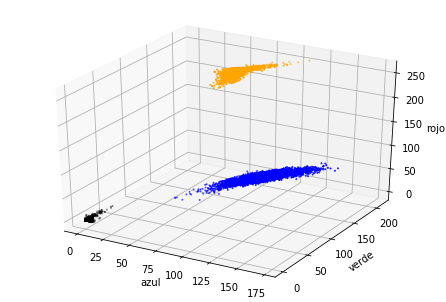

In [20]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(df[variables[0]].values, df[variables[1]].values, df[variables[2]].values,c=asignar, s=1)
ax.set_xlabel(variables[0])
ax.set_ylabel(variables[1])
ax.set_zlabel(variables[2])
plt.show()

No se consiguió graficar la 4º clase que corresponde a la columa obtenida con el filtro de detección de bordes.

## Ejercicio 9:

### A la imagen del ejericio 5 clasifíquela utilizando la muestra de entrenamiento y K-NN (k vecinos más cercanos). O con el método que guste.

KNN (K - Nearest Neighbors), es un algoritmo de clasificación supervisada que calcula la distancia de un punto al resto de puntos en el conjunto de estudio.
El algoritmo dependiendo del valor de K, determina los K vecinos más cercanos.

[K-NN](https://medium.com/deep-math-machine-learning-ai/chapter-5-k-nearest-neighbors-algorithm-with-code-from-scratch-7f93f653c860)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = 5

knn = KNeighborsClassifier(n_neighbors)
knn.fit(data, target)
print('Presición del clasificador K-NN en el conjunto de entrenamiento: %.2f' % knn.score(data, target))

Presición del clasificador K-NN en el conjunto de entrenamiento: 1.00


[KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [27]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


Existen diferentes maneras de calcular la distancia de un punto a otro. En este caso vemos que usa Minkowski.

![](https://cdn-images-1.medium.com/max/800/1*FlMiuoENrq52tMV4S6LSZg.png)

[K-NN](https://medium.com/deep-math-machine-learning-ai/chapter-5-k-nearest-neighbors-algorithm-with-code-from-scratch-7f93f653c860)

(399, 600, 3)
[2.]


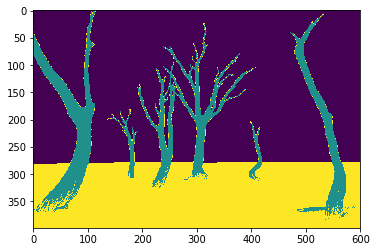

In [26]:
a=imagen.shape
print(a)
clasif=np.zeros(a[0:2])
print(knn.predict([[40, 80, 40]]))
for i in range(a[0]): #filas
    for j in range(a[1]): #columnas
        clasif[i,j]=knn.predict([imagen[i,j,:]])
        
plt.imshow(clasif)
plt.show()

### Mostramos a continuación como quedan los resultados de la predicción para cada una de las muestras ejemplo.

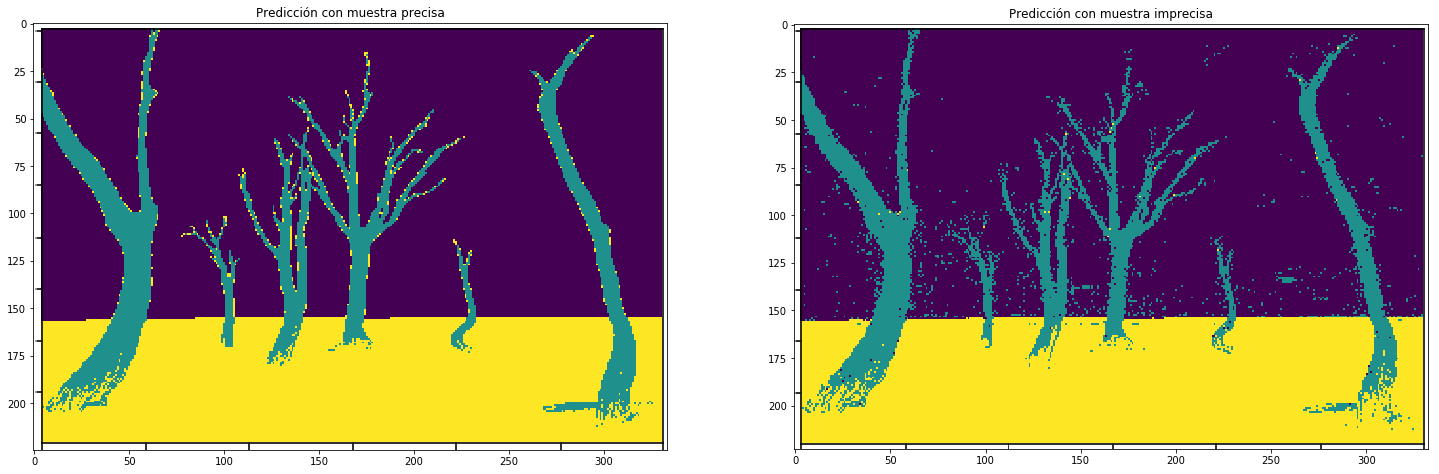

In [23]:
%matplotlib inline  

ejemplo1 = cv.imread('ejemplo1.png')
ejemplo1 = ejemplo1.astype('uint8')
ejemplo2 = cv.imread('ejemplo2.png')
ejemplo2 = ejemplo2.astype('uint8')

#Armamos la grilla.
gs = gridspec.GridSpec(1, 2)

#Define los tamaños de las imágenes
figs = plt.figure(constrained_layout=True)
figs.set_figheight(10)
figs.set_figwidth(25)

#Aquí se pueden definir los tamaños de las celdas.
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

ax1.set_title("Predicción con muestra precisa")
ax1.imshow(cv.cvtColor(ejemplo1, cv.COLOR_BGR2RGB), cmap='gray')
ax2.set_title("Predicción con muestra imprecisa")
ax2.imshow(cv.cvtColor(ejemplo2, cv.COLOR_BGR2RGB), cmap='gray')
plt.show()

Se puede ver claramente como influye la selección de las regiones de interés en la predicción final.

## Ejercicio 10:

### Generar una máscara o elemento estructural, y realice con éste una mejora de la clasificación obtenida en el ejercicio anterior utilizando un filtro de moda. Mirando el resultado final decida si considera que la clasificación fue buena y si la cantidad de clases elegida fue la adecuada.    

In [29]:
from statistics import mode
clasif2=clasif[:,:]
for i in range(2,a[0]-2): #filas
    for j in range(2,a[1]-2): #columnas
        try:
            clasif2[i,j]=mode(clasif[i-2:i+3,j-2:j+3].ravel())
        except:
            clasif2[i,j]=clasif[i,j]

Lo que el código anterior hace es, considerando el pixel de estudio y sus vecinos, determinar cual es el valor que más se repite. Ese valor de máxima ocurrencia reemplaza al valor original del pixel central.
Lo que hace esto es eliminar el ruido de la imagen.

[Mode Pixel Value Filter](http://www.roborealm.com/help/Mode.php)

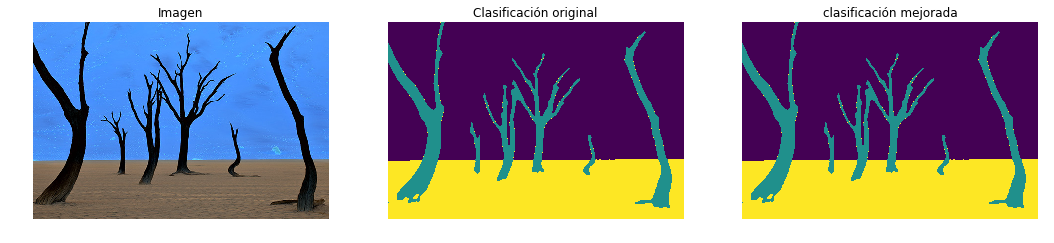

In [30]:
clasif = clasif.astype('uint8')

fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
fig.set_figheight(10)
fig.set_figwidth(18)
axs[0].imshow(imagen)
axs[0].set_title("Imagen")
axs[0].axis('off')
axs[1].imshow(clasif)
axs[1].set_title("Clasificación original")
axs[1].axis('off')
axs[2].imshow(clasif2)
axs[2].set_title('clasificación mejorada')
axs[2].axis('off')
plt.show()

Se aprecia una mejora en la imagen eliminando algunos puntos aislados que ensucian la misma en lo que serían los bordes de los árboles de la imagen. Sin embargo puede verse también como se empeora la "textura" que los árboles poseen en la base.